In [1]:
# Question: Advanced Data Cleaning with Multiple Issues
# Objective: Handle multiple issues in one dataset, including missing values, duplicates, and outliers.
# Description: Given a dataset with various data quality issues, employ multiple data cleaning techniques.


import pandas as pd
import numpy as np
from scipy import stats

# Sample DataFrame with multiple data quality issues
data = {'ID': [1, 2, 3, 4, 5, 6, 2, 7, 8, 9, 10, 8],
        'Name': ['Alice', 'bob', 'Charlie', np.nan, 'Eve', 'BOB', 'bob', 'Frank', 'Grace', 'harry', 'Judy', 'Grace'],
        'Age': [25, 30, np.nan, 22, 35, 30, 30, np.nan, 28, 32, 26, 28],
        'Salary': [50000, 60000, 45000, np.nan, 70000, 60000, 60000, 55000, 80000, 90000, 48000, 800000], # Outlier
        'City': ['New York', 'london', 'Paris', 'london', 'Tokyo', 'london', 'london', 'Berlin', 'New York', 'Sydney', 'Paris', 'New York']}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# 1. Standardize Text Data (Case Consistency)
df['Name'] = df['Name'].str.lower()
df['City'] = df['City'].str.lower()
print("\n1. DataFrame after standardizing text case:")
print(df)

# 2. Handle Missing Values
print("\n2. Handling Missing Values")

# Fill missing 'Name' with 'Unknown'
df['Name'].fillna('unknown', inplace=True)

# Fill missing 'Age' with the median age
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Fill missing 'Salary' with the median salary
median_salary = df['Salary'].median()
df['Salary'].fillna(median_salary, inplace=True)

print("\nDataFrame after filling missing values:")
print(df)

# 3. Handle Duplicates
print("\n3. Handling Duplicates")

# Identify and remove duplicate rows based on all columns
print("\nDuplicate rows:")
print(df[df.duplicated()])
df.drop_duplicates(inplace=True)
print("\nDataFrame after removing duplicate rows:")
print(df)

# 4. Handle Outliers (using Z-score for 'Salary')
print("\n4. Handling Outliers in 'Salary'")

# Calculate Z-scores for the 'Salary' column
df['Salary_ZScore'] = np.abs(stats.zscore(df['Salary']))
print("\nDataFrame with Salary Z-scores:")
print(df)

# Identify outliers (e.g., |Z-score| > 3)
outlier_threshold = 3
outliers_salary = df[df['Salary_ZScore'] > outlier_threshold]
print(f"\nOutliers in 'Salary' (Z-score > {outlier_threshold}):")
print(outliers_salary)

# Option 1: Remove outliers
df_no_salary_outliers = df[df['Salary_ZScore'] <= outlier_threshold].copy()
df_no_salary_outliers.drop(columns=['Salary_ZScore'], inplace=True)
print("\nDataFrame after removing salary outliers:")
print(df_no_salary_outliers)

# Option 2: Cap outliers (winsorizing) - keeping the original DataFrame for this
df['Salary_Capped'] = df['Salary'].copy()
upper_bound = df['Salary'].mean() + outlier_threshold * df['Salary'].std()
lower_bound = df['Salary'].mean() - outlier_threshold * df['Salary'].std()
df.loc[df['Salary_Capped'] > upper_bound, 'Salary_Capped'] = upper_bound
df.loc[df['Salary_Capped'] < lower_bound, 'Salary_Capped'] = lower_bound
print("\nDataFrame with 'Salary' outliers capped:")
print(df[['ID', 'Name', 'Age', 'Salary', 'Salary_Capped']])

# We'll proceed with the DataFrame where outliers were removed for subsequent steps
cleaned_df = df_no_salary_outliers.copy()

# 5. Further Formatting (Optional)
print("\n5. Further Formatting (Optional)")

# Round 'Age' to the nearest integer
cleaned_df['Age'] = cleaned_df['Age'].round().astype(int)
print("\nDataFrame after rounding 'Age':")
print(cleaned_df)

# Final Cleaned DataFrame
print("\nFinal Cleaned DataFrame:")
print(cleaned_df)

Original DataFrame:
    ID     Name   Age    Salary      City
0    1    Alice  25.0   50000.0  New York
1    2      bob  30.0   60000.0    london
2    3  Charlie   NaN   45000.0     Paris
3    4      NaN  22.0       NaN    london
4    5      Eve  35.0   70000.0     Tokyo
5    6      BOB  30.0   60000.0    london
6    2      bob  30.0   60000.0    london
7    7    Frank   NaN   55000.0    Berlin
8    8    Grace  28.0   80000.0  New York
9    9    harry  32.0   90000.0    Sydney
10  10     Judy  26.0   48000.0     Paris
11   8    Grace  28.0  800000.0  New York

1. DataFrame after standardizing text case:
    ID     Name   Age    Salary      City
0    1    alice  25.0   50000.0  new york
1    2      bob  30.0   60000.0    london
2    3  charlie   NaN   45000.0     paris
3    4      NaN  22.0       NaN    london
4    5      eve  35.0   70000.0     tokyo
5    6      bob  30.0   60000.0    london
6    2      bob  30.0   60000.0    london
7    7    frank   NaN   55000.0    berlin
8    8    g

In [2]:
# Question: Data Transformation Techniques
# Objective: Transform skewed data using log transformation.
# Description: Perform a log transformation to handle skewness in a dataset, which is particularly useful for
# certain machine learning models.



Original DataFrame:
       Revenue
0   469.268090
1  3010.121431
2  1316.745694
3   912.942554
4   169.624870

DataFrame after Log Transformation:
       Revenue  Revenue_Log
0   469.268090     6.151174
1  3010.121431     8.009736
2  1316.745694     7.182919
3   912.942554     6.816673
4   169.624870     5.133589


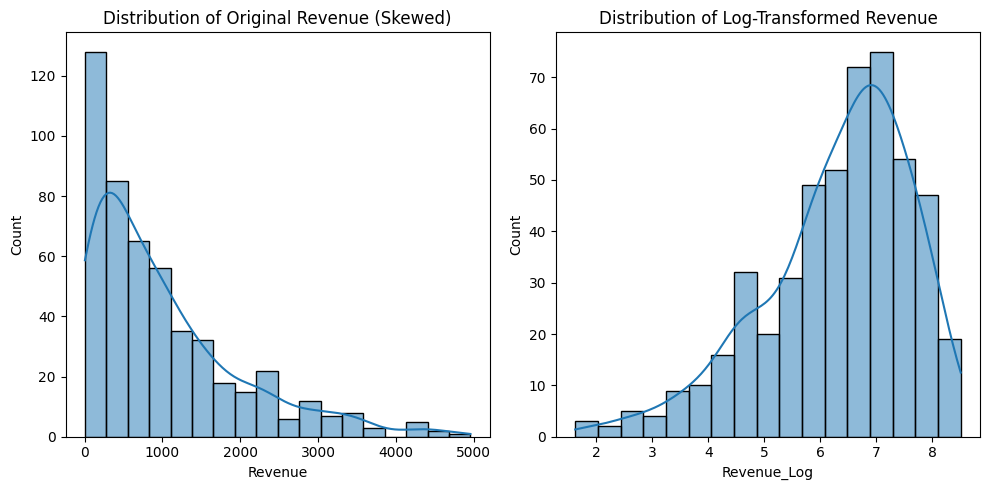


Skewness of Original Revenue: 1.4452405648572402
Skewness of Log-Transformed Revenue: -0.8964834601241792

DataFrame after Inverse Transformation:
       Revenue  Revenue_Log  Revenue_Exp
0   469.268090     6.151174   469.268090
1  3010.121431     8.009736  3010.121431
2  1316.745694     7.182919  1316.745694
3   912.942554     6.816673   912.942554
4   169.624870     5.133589   169.624870


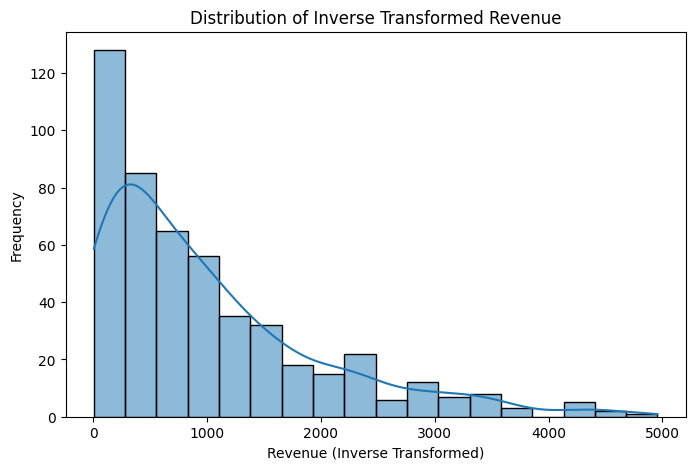

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame with a skewed numerical column
np.random.seed(42)
data = {'Revenue': np.random.exponential(scale=1000, size=500)}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df.head())

# Visualize the distribution of the original 'Revenue' column
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Revenue'], kde=True)
plt.title('Distribution of Original Revenue (Skewed)')

# 1. Apply Log Transformation
# We add a small constant to avoid log(0) errors if there are zero values
epsilon = 1e-5
df['Revenue_Log'] = np.log(df['Revenue'] + epsilon)

print("\nDataFrame after Log Transformation:")
print(df.head())

# Visualize the distribution of the log-transformed 'Revenue' column
plt.subplot(1, 2, 2)
sns.histplot(df['Revenue_Log'], kde=True)
plt.title('Distribution of Log-Transformed Revenue')

plt.tight_layout()
plt.show()

# Optional: Compare skewness
print(f"\nSkewness of Original Revenue: {df['Revenue'].skew()}")
print(f"Skewness of Log-Transformed Revenue: {df['Revenue_Log'].skew()}")

# Optional: Inverse Transformation (for interpretation or model output)
df['Revenue_Exp'] = np.exp(df['Revenue_Log']) - epsilon
print("\nDataFrame after Inverse Transformation:")
print(df.head())

# Optional: Visualize the inverse transformed data
plt.figure(figsize=(8, 5))
sns.histplot(df['Revenue_Exp'], kde=True)
plt.title('Distribution of Inverse Transformed Revenue')
plt.xlabel('Revenue (Inverse Transformed)')
plt.ylabel('Frequency')
plt.show()

In [4]:
# Question: Feature Engineering by Creating New Features
# Objective: Create a new feature based on existing features to add predictive power.
# Description: Generate additional features from existing data to potentially improve the performance of
# prediction models.




In [5]:
import pandas as pd

# Sample DataFrame
data = {'Product_ID': [1, 2, 3, 4, 5],
        'Price': [100, 250, 150, 300, 200],
        'Quantity_Sold': [10, 5, 12, 8, 15],
        'Discount_Percentage': [0.05, 0.10, 0.00, 0.15, 0.02]}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# 1. Create a new feature: Total Revenue
# Total Revenue = Price * Quantity Sold
df['Total_Revenue'] = df['Price'] * df['Quantity_Sold']
print("\nDataFrame with 'Total_Revenue' feature:")
print(df)

# 2. Create another new feature: Discount Amount
# Discount Amount = Price * Discount Percentage
df['Discount_Amount'] = df['Price'] * df['Discount_Percentage']
print("\nDataFrame with 'Discount_Amount' feature:")
print(df)

# 3. Create a feature based on a condition: Is Discount Applied?
# 1 if Discount Percentage > 0, 0 otherwise
df['Is_Discount_Applied'] = df['Discount_Percentage'].apply(lambda x: 1 if x > 0 else 0)
print("\nDataFrame with 'Is_Discount_Applied' feature:")
print(df)

# 4. Create a categorical feature based on a numerical feature: Price Category
# Example: Low (<150), Medium (150-250), High (>250)
def categorize_price(price):
    if price < 150:
        return 'Low'
    elif 150 <= price <= 250:
        return 'Medium'
    else:
        return 'High'

df['Price_Category'] = df['Price'].apply(categorize_price)
print("\nDataFrame with 'Price_Category' feature:")
print(df)

# 5. Create a feature by combining text features (if applicable)
# For this example, let's create a hypothetical 'Product_Category'
category_map = {1: 'Electronics', 2: 'Electronics', 3: 'Home Goods', 4: 'Electronics', 5: 'Books'}
df['Product_Category'] = df['Product_ID'].map(category_map)
df['Product_Info'] = df['Product_Category'] + ' - ' + df['Product_ID'].astype(str)
print("\nDataFrame with combined text feature 'Product_Info':")
print(df)

# 6. Create a time-based feature (if a date or time column exists)
# For this example, let's create a hypothetical 'Order_Date'
dates = pd.to_datetime(['2024-01-15', '2024-02-20', '2024-01-20', '2024-03-10', '2024-02-25'])
df['Order_Date'] = dates
df['Month'] = df['Order_Date'].dt.month
df['Day_of_Week'] = df['Order_Date'].dt.day_name()
print("\nDataFrame with time-based features:")
print(df)

Original DataFrame:
   Product_ID  Price  Quantity_Sold  Discount_Percentage
0           1    100             10                 0.05
1           2    250              5                 0.10
2           3    150             12                 0.00
3           4    300              8                 0.15
4           5    200             15                 0.02

DataFrame with 'Total_Revenue' feature:
   Product_ID  Price  Quantity_Sold  Discount_Percentage  Total_Revenue
0           1    100             10                 0.05           1000
1           2    250              5                 0.10           1250
2           3    150             12                 0.00           1800
3           4    300              8                 0.15           2400
4           5    200             15                 0.02           3000

DataFrame with 'Discount_Amount' feature:
   Product_ID  Price  Quantity_Sold  Discount_Percentage  Total_Revenue  \
0           1    100             10            

In [6]:
# Question: Handling Complex Outliers with Z-Scores
# Objective: Detect and handle outliers using Z-score method.
# Description: Use the Z-score method to identify outliers which significantly differ from the rest of the data points.




Original DataFrame:
       Value
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


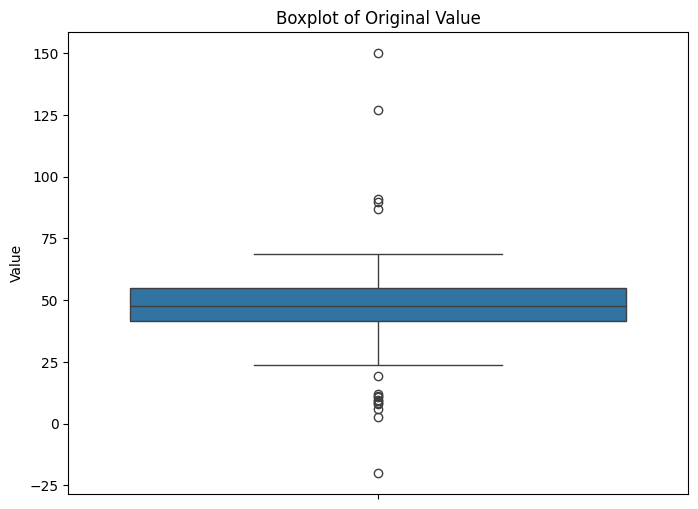

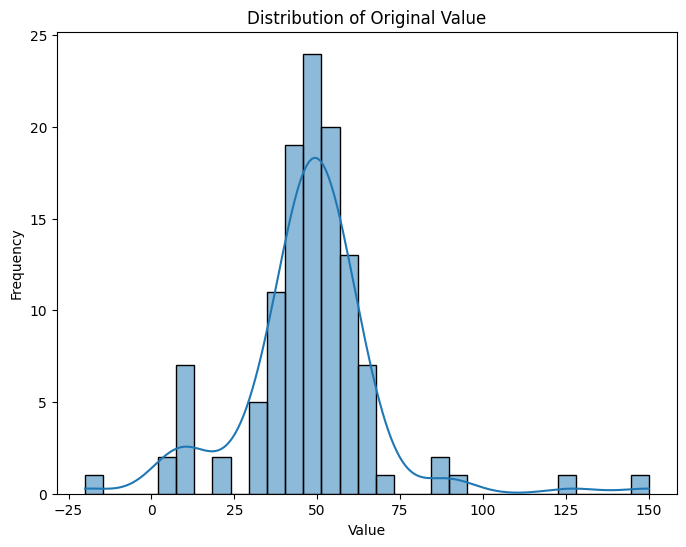


DataFrame with Z-scores:
       Value    ZScore
0  54.967142  0.353614
1  48.617357  0.045157
2  56.476885  0.426954
3  65.230299  0.852173
4  47.658466  0.001423

Outliers (with |Z-score| > 3):
          Value    ZScore
113  126.948632  3.850299
115  150.000000  4.970078
116  -20.000000  3.288106

DataFrame after removing outliers:
       Value
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


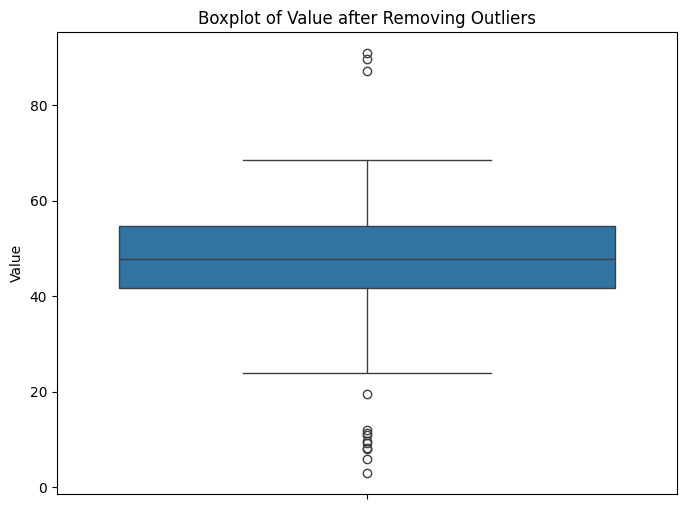

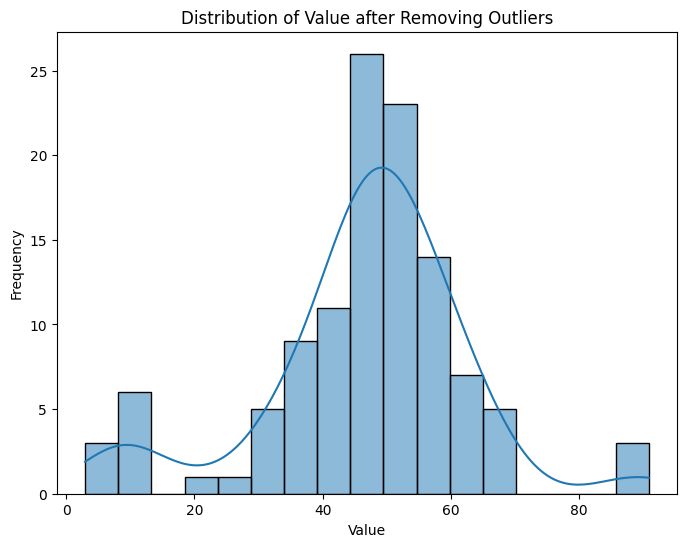


DataFrame with outliers capped:
       Value  Value_Capped
0  54.967142     54.967142
1  48.617357     48.617357
2  56.476885     56.476885
3  65.230299     65.230299
4  47.658466     47.658466


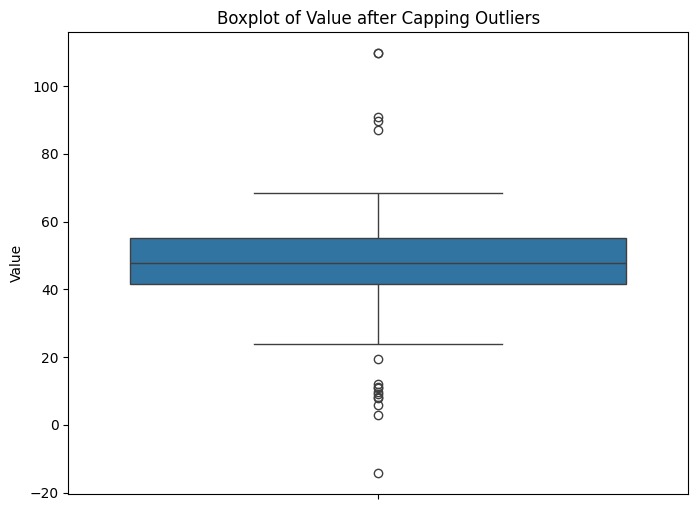

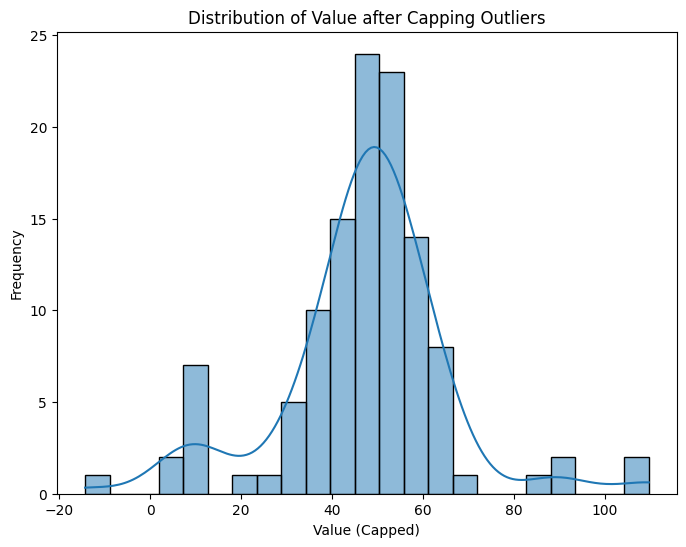


DataFrame with Log-Transformed Value (handling potential non-positive):
       Value  Value_Log
0  54.967142   4.317050
1  48.617357   4.228546
2  56.476885   4.336989
3  65.230299   4.445357
4  47.658466   4.214473


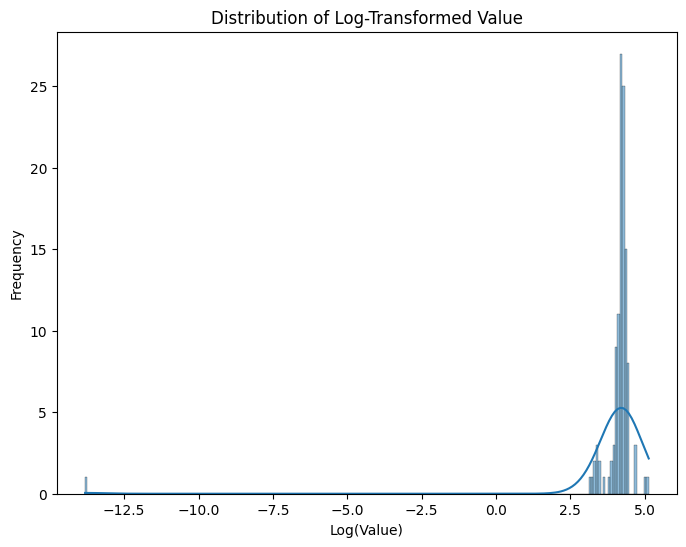

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame with potential outliers in a numerical column
np.random.seed(42)
data = {'Value': np.concatenate([np.random.normal(loc=50, scale=10, size=100),
                                 np.random.normal(loc=10, scale=5, size=10),  # Lower outliers
                                 np.random.normal(loc=90, scale=15, size=5),  # Higher outliers
                                 [150, -20]])}  # More extreme outliers
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df.head())

# Visualize the distribution of the original 'Value' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Value'])
plt.title('Boxplot of Original Value')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Value'], kde=True)
plt.title('Distribution of Original Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# 1. Calculate Z-scores
df['ZScore'] = np.abs(stats.zscore(df['Value']))
print("\nDataFrame with Z-scores:")
print(df.head())

# 2. Set a threshold to identify outliers
threshold = 3
outliers = df[df['ZScore'] > threshold]
print(f"\nOutliers (with |Z-score| > {threshold}):")
print(outliers)

# 3. Handling Outliers (Options)

# Option A: Removing Outliers
df_no_outliers = df[df['ZScore'] <= threshold].copy()
df_no_outliers.drop(columns=['ZScore'], inplace=True)
print("\nDataFrame after removing outliers:")
print(df_no_outliers.head())

# Visualize the distribution after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_no_outliers['Value'])
plt.title('Boxplot of Value after Removing Outliers')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df_no_outliers['Value'], kde=True)
plt.title('Distribution of Value after Removing Outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Option B: Capping Outliers (Winsorizing)
df_capped = df.copy()
mean_value = df['Value'].mean()
std_value = df['Value'].std()
upper_bound = mean_value + threshold * std_value
lower_bound = mean_value - threshold * std_value

df_capped['Value_Capped'] = df['Value'].clip(lower=lower_bound, upper=upper_bound)
df_capped.drop(columns=['ZScore'], inplace=True)
print("\nDataFrame with outliers capped:")
print(df_capped.head())

# Visualize the distribution after capping outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_capped['Value_Capped'])
plt.title('Boxplot of Value after Capping Outliers')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df_capped['Value_Capped'], kde=True)
plt.title('Distribution of Value after Capping Outliers')
plt.xlabel('Value (Capped)')
plt.ylabel('Frequency')
plt.show()

# Option C: Transforming the data (e.g., Log Transformation) - depends on the nature of outliers
# If outliers are due to a skewed distribution, log transformation might help
df_transformed = df.copy()
df_transformed['Value_Log'] = np.log(df_transformed['Value'] - df_transformed['Value'].min() + 1e-6) # Shift to handle potential non-positive values
df_transformed.drop(columns=['ZScore'], inplace=True)
print("\nDataFrame with Log-Transformed Value (handling potential non-positive):")
print(df_transformed.head())

plt.figure(figsize=(8, 6))
sns.histplot(df_transformed['Value_Log'], kde=True)
plt.title('Distribution of Log-Transformed Value')
plt.xlabel('Log(Value)')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Question: Data Imputation with K-Nearest Neighbors (KNN)
# Objective: Impute missing numerical values using the KNN method.
# Description: Use the K-nearest neighbors algorithm to fill in missing values, which considers the values of
# nearest neighbors for imputation.




In [9]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Sample DataFrame with missing numerical values
data = {'Feature_A': [10, 12, np.nan, 15, 18, 20, np.nan, 25],
        'Feature_B': [5, np.nan, 7, 9, 11, 13, 15, np.nan],
        'Feature_C': [1, 2, 3, 4, np.nan, 6, 7, 8]}
df = pd.DataFrame(data)

print("Original DataFrame with Missing Values:")
print(df)

# 1. Initialize the KNNImputer
# n_neighbors: Number of neighbors to consider for imputation
imputer = KNNImputer(n_neighbors=2)

# 2. Fit and transform the data
# KNNImputer works with numerical data, so we select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
df_imputed_array = imputer.fit_transform(df[numerical_cols])

# 3. Create a new DataFrame with the imputed values
df_imputed = pd.DataFrame(df_imputed_array, columns=numerical_cols)

print("\nDataFrame with KNN Imputed Values:")
print(df_imputed)

# If you have non-numerical columns, you'll need to handle them separately
# and then merge with the imputed numerical data.

# Example with a categorical column:
data_mixed = {'Numerical_Feature': [10, np.nan, 15, 20],
              'Categorical_Feature': ['A', 'B', 'A', np.nan]}
df_mixed = pd.DataFrame(data_mixed)
print("\nOriginal DataFrame with Mixed Data Types:")
print(df_mixed)

# Impute numerical features
numerical_cols_mixed = df_mixed.select_dtypes(include=np.number).columns
imputer_mixed = KNNImputer(n_neighbors=2)
df_numerical_imputed_array_mixed = imputer_mixed.fit_transform(df_mixed[numerical_cols_mixed])
df_numerical_imputed_mixed = pd.DataFrame(df_numerical_imputed_array_mixed, columns=numerical_cols_mixed)

# Handle categorical features (KNNImputer doesn't directly handle them)
# For categorical features, you might use mode imputation or other methods.
df_categorical_filled_mixed = df_mixed['Categorical_Feature'].fillna(df_mixed['Categorical_Feature'].mode()[0] if not df_mixed['Categorical_Feature'].mode().empty else 'Missing')

# Combine the imputed numerical and handled categorical features
df_mixed_imputed = pd.concat([df_numerical_imputed_mixed, df_categorical_filled_mixed], axis=1)
print("\nDataFrame with Mixed Data Types after Imputation:")
print(df_mixed_imputed)

Original DataFrame with Missing Values:
   Feature_A  Feature_B  Feature_C
0       10.0        5.0        1.0
1       12.0        NaN        2.0
2        NaN        7.0        3.0
3       15.0        9.0        4.0
4       18.0       11.0        NaN
5       20.0       13.0        6.0
6        NaN       15.0        7.0
7       25.0        NaN        8.0

DataFrame with KNN Imputed Values:
   Feature_A  Feature_B  Feature_C
0       10.0        5.0        1.0
1       12.0        6.0        2.0
2       13.5        7.0        3.0
3       15.0        9.0        4.0
4       18.0       11.0        5.0
5       20.0       13.0        6.0
6       22.5       15.0        7.0
7       25.0       14.0        8.0

Original DataFrame with Mixed Data Types:
   Numerical_Feature Categorical_Feature
0               10.0                   A
1                NaN                   B
2               15.0                   A
3               20.0                 NaN

DataFrame with Mixed Data Types after Imputat